In [1]:
import importlib

import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

import keras
from keras import backend as K
import train

import pandas as pd

keras.__version__

Using TensorFlow backend.


'1.2.1'

In [2]:
importlib.reload(train)

<module 'train' from '/home/dtyeh/2017/carnd1/CarND-Behavioral-Cloning-P3/train.py'>

In [3]:
#csvpath = "./mydata/"
#image_path = "/mnt/g/gshare/carnd/fwd2/IMG/"
image_path = "./fwd2/IMG/"
csvpath = "./fwd2/"
df=pd.read_csv(csvpath + "driving_log.csv", header=None, names=["center", "left", "right", "angle", "throttle", "brake", "speed"])

In [4]:
### flip all images and their angles, concat to end
df['flip'] = False

dfflip = df.copy()
dfflip['angle'] = -dfflip['angle']
dfflip['flip'] = True
dftrain = pd.concat([df, dfflip])

print(df.iloc[0])
print(dfflip.iloc[0])

center      G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_...
left        G:\gshare\carnd\fwd2\IMG\left_2017_05_03_06_24...
right       G:\gshare\carnd\fwd2\IMG\right_2017_05_03_06_2...
angle                                                0.168364
throttle                                                    0
brake                                                       0
speed                                                 3.85445
flip                                                    False
Name: 0, dtype: object
center      G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_...
left        G:\gshare\carnd\fwd2\IMG\left_2017_05_03_06_24...
right       G:\gshare\carnd\fwd2\IMG\right_2017_05_03_06_2...
angle                                               -0.168364
throttle                                                    0
brake                                                       0
speed                                                 3.85445
flip                                           

In [5]:
y_train = dftrain["angle"].values
n_train = len(y_train)
print("n_train:", n_train)

n_train: 13386


mean:	 -2.3886465792e-18
median:	 0.0
std:	 0.1886809602
mode:	 ModeResult(mode=array([-0.]), count=array([3090]))


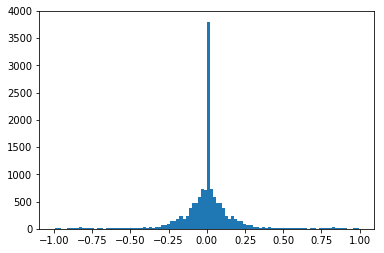

In [6]:
### Plot some statistics
print("mean:\t", np.mean(y_train))
print("median:\t", np.median(y_train))
print("std:\t", np.std(y_train))
print("mode:\t", scipy.stats.mode(y_train))

# y_trainall = np.hstack((y_train, -y_train))
plt.hist(y_train, bins=100)
plt.show()


In [7]:
y_train

array([ 0.1683641 ,  0.2031788 ,  0.2482421 , ..., -0.01599294,
       -0.        , -0.01599294])

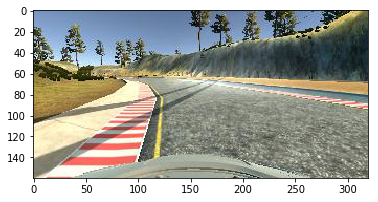

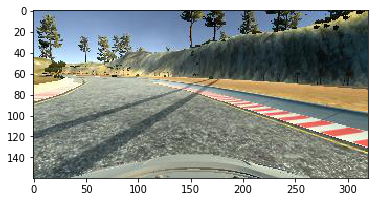

,center,left,right,angle,throttle,brake,speed,flip
0,G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_...,G:\gshare\carnd\fwd2\IMG\left_2017_05_03_06_24...,G:\gshare\carnd\fwd2\IMG\right_2017_05_03_06_2...,0.516663,0.380295,0,5.878299,False
1,G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_...,G:\gshare\carnd\fwd2\IMG\left_2017_05_03_06_24...,G:\gshare\carnd\fwd2\IMG\right_2017_05_03_06_2...,-0.233020,0.312515,0,12.673360,False
2,G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_...,G:\gshare\carnd\fwd2\IMG\left_2017_05_03_06_24...,G:\gshare\carnd\fwd2\IMG\right_2017_05_03_06_2...,0.000000,0.264101,0,16.804620,False
3,G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_...,G:\gshare\carnd\fwd2\IMG\left_2017_05_03_06_24...,G:\gshare\carnd\fwd2\IMG\right_2017_05_03_06_2...,0.516663,0.380295,0,5.878299,True


In [8]:
pos_entry = df[df.angle > 0.].iloc[10]
neg_entry = df[df.angle < -0.1].iloc[10]; neg_entry
zero_entry = df[df.angle == 0.].iloc[10]; zero_entry

dfsub = pd.DataFrame([pos_entry, neg_entry, zero_entry])
dfsub = dfsub.append(pos_entry, ignore_index=True)
dfsub.at[3, 'flip'] = True

X_sub = train.loadImagesPd(dfsub, image_path)
plt.imshow(X_sub[0])
plt.show()

plt.imshow(X_sub[1])
plt.show()

dfsub

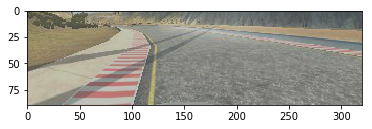

In [12]:
### check the cropping
model = train.nvidiaModel()
get_1st_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output = get_1st_layer_output([X_sub])[0]
plt.imshow(layer_output[0]*0.5 - 0.5)
plt.show()

Epoch 1/20
10624/10708 [============================>.] - ETA: 0s - loss: 0.0290

/home/dtyeh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


10752/10708 [==============================] - 10s - loss: 0.0289 - val_loss: 0.0183
Epoch 2/20
10752/10708 [==============================] - 10s - loss: 0.0207 - val_loss: 0.0164
Epoch 3/20
10752/10708 [==============================] - 10s - loss: 0.0171 - val_loss: 0.0104
Epoch 4/20
10832/10708 [==============================] - 10s - loss: 0.0130 - val_loss: 0.0084
Epoch 5/20
10752/10708 [==============================] - 10s - loss: 0.0116 - val_loss: 0.0076
Epoch 6/20
10752/10708 [==============================] - 10s - loss: 0.0097 - val_loss: 0.0068
Epoch 7/20
10752/10708 [==============================] - 10s - loss: 0.0091 - val_loss: 0.0069
Epoch 8/20
10832/10708 [==============================] - 10s - loss: 0.0080 - val_loss: 0.0087
Epoch 9/20
10752/10708 [==============================] - 10s - loss: 0.0072 - val_loss: 0.0060
Epoch 10/20
10752/10708 [==============================] - 10s - loss: 0.0064 - val_loss: 0.0056
Epoch 11/20
10752/10708 [=========================

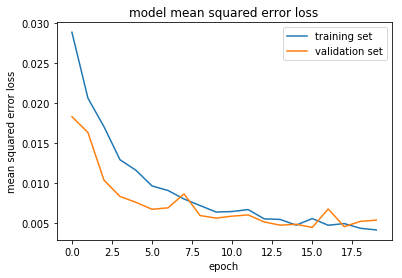

In [13]:
history=train.train_gen(model, dftrain, image_path, batch_size=128, epochs=20)
# help(model.fit_generator)

In [14]:
model.save('model.h5')
